### Problem Defintion

This project aims to predict the prices of houses in Nigeria using Machine learning features like Title, Location, Bathrooms, Bedrooms and parking space. 

### Data

Data for this project will be obtained from the online platform **kaggle**

### Data Cleaning

In [6]:
import pandas as pd
data = pd.read_csv("nigeria_houses_data.csv")
data

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6,5,5,4,Detached Duplex,Mabushi,Abuja,450000000.0
1,4,5,5,4,Terraced Duplexes,Katampe,Abuja,800000000.0
2,4,5,5,4,Detached Duplex,Lekki,Lagos,120000000.0
3,4,4,5,6,Detached Duplex,Ajah,Lagos,40000000.0
4,4,4,5,2,Semi Detached Duplex,Lekki,Lagos,75000000.0
...,...,...,...,...,...,...,...,...
24321,2,2,2,4,Block of Flats,Kabusa,Abuja,15000000.0
24322,4,5,5,4,Block of Flats,Ado-Odo/Ota,Ogun,25000000.0
24323,4,5,5,4,Detached Duplex,Lekki,Lagos,68000000.0
24324,3,4,4,3,Block of Flats,Victoria Island (VI),Lagos,78000000.0


In [7]:
# checking for basic info about the data.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24326 entries, 0 to 24325
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       24326 non-null  int64  
 1   bathrooms      24326 non-null  int64  
 2   toilets        24326 non-null  int64  
 3   parking_space  24326 non-null  int64  
 4   title          24325 non-null  object 
 5   town           24325 non-null  object 
 6   state          24325 non-null  object 
 7   price          24318 non-null  float64
dtypes: float64(1), int64(4), object(3)
memory usage: 1.5+ MB


In [8]:
# checking for missing values in the data set
data.isnull().sum()

bedrooms         0
bathrooms        0
toilets          0
parking_space    0
title            1
town             1
state            1
price            8
dtype: int64

In [9]:
# discarding missing values
data.dropna(inplace=True)

In [10]:
# checking to see if missing values have been dropped
data.isna().sum()

bedrooms         0
bathrooms        0
toilets          0
parking_space    0
title            0
town             0
state            0
price            0
dtype: int64

In [11]:
data.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6,5,5,4,Detached Duplex,Mabushi,Abuja,450000000.0
1,4,5,5,4,Terraced Duplexes,Katampe,Abuja,800000000.0
2,4,5,5,4,Detached Duplex,Lekki,Lagos,120000000.0
3,4,4,5,6,Detached Duplex,Ajah,Lagos,40000000.0
4,4,4,5,2,Semi Detached Duplex,Lekki,Lagos,75000000.0


In [12]:
# creating a new column with the name "price_millions". which will be the previous price column divided by 1 million.
data['price_millions'] = data['price'] / 1000000

In [13]:
# remove the original "price" column since we now have a new column "price_million"
data.drop(columns=['price'], inplace=True)

In [15]:
# Display the trimmed data with the new 'price_milion' column
data

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price_millions
0,6,5,5,4,Detached Duplex,Mabushi,Abuja,450.0
1,4,5,5,4,Terraced Duplexes,Katampe,Abuja,800.0
2,4,5,5,4,Detached Duplex,Lekki,Lagos,120.0
3,4,4,5,6,Detached Duplex,Ajah,Lagos,40.0
4,4,4,5,2,Semi Detached Duplex,Lekki,Lagos,75.0
...,...,...,...,...,...,...,...,...
24321,2,2,2,4,Block of Flats,Kabusa,Abuja,15.0
24322,4,5,5,4,Block of Flats,Ado-Odo/Ota,Ogun,25.0
24323,4,5,5,4,Detached Duplex,Lekki,Lagos,68.0
24324,3,4,4,3,Block of Flats,Victoria Island (VI),Lagos,78.0


### Exploratory Data Analysis

In [16]:
# Calculating the lowest, highest, and mean of the "price_million" column
lowest_price = data["price_millions"].min()
highest_price = data["price_millions"].max()
mean_price = data["price_millions"].mean()

In [17]:
# Displaying the result of our calculation from their respective variables. 
print(f"Lowest Price:", lowest_price)
print(f"Highest Price:", highest_price)
print(f"Mean Price:", mean_price)

Lowest Price: 0.09
Highest Price: 1800000.0
Mean Price: 301.4341387218818


In [18]:
# Display rows where price is less than 10 million
rows_less_than_10_million = data [data['price_millions'] < 10]
rows_less_than_10_million.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price_millions
33,2,3,5,4,Block of Flats,Mowe Ofada,Ogun,7.0
56,2,2,2,4,Detached Bungalow,Abeokuta North,Ogun,4.0
78,1,2,2,1,Block of Flats,Sango Ota,Ogun,6.9
88,4,2,2,1,Terraced Bungalow,Sango Ota,Ogun,5.0
160,4,5,5,2,Detached Bungalow,Ado-Odo/Ota,Ogun,6.0


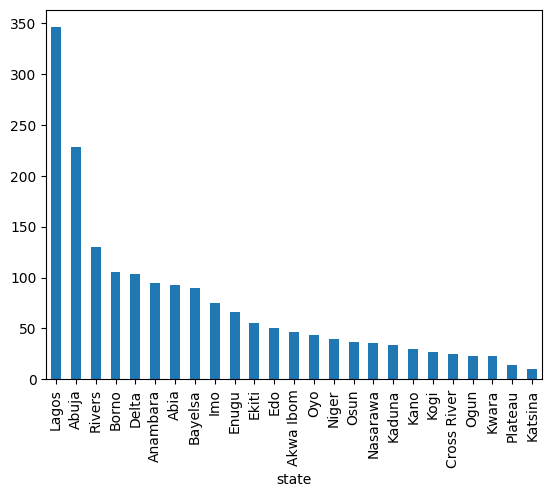

In [19]:
# grouping data by state in addition to ploting a bar chart for the mean of our price against the various state in our entries
data.groupby('state')["price_millions"].mean().sort_values(ascending=False).plot(kind="bar");

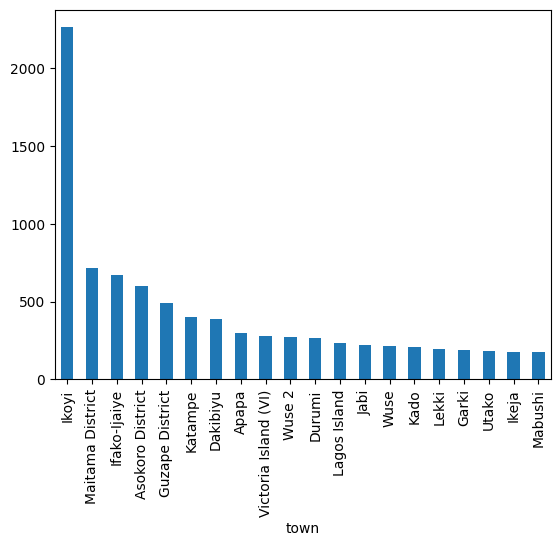

In [20]:
# grouping data by town in addition to ploting a bar chart for the mean of our price against the first 20 entries of our town.
data.groupby('town')["price_millions"].mean().sort_values(ascending=False).head(20).plot(kind="bar");

In [22]:
# calculate the 15th and 85th percentiles of the price column
q1, q9 = data["price_millions"].quantile([0.15, 0.85])

# create a boolean mask where price is between the 15th and 85th percentiles i.e pick only the prices that falls within the range.
mask_data = data["price_millions"].between(q1, q9)

# Filter the dataset using the mask to retain rows within the specified price range i.e picking only the "mask data" from the entire data set.
trimmed_data = data[mask_data]
trimmed_data

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price_millions
2,4,5,5,4,Detached Duplex,Lekki,Lagos,120.0
3,4,4,5,6,Detached Duplex,Ajah,Lagos,40.0
4,4,4,5,2,Semi Detached Duplex,Lekki,Lagos,75.0
5,4,4,5,2,Semi Detached Duplex,Lekki,Lagos,75.0
6,4,5,5,4,Detached Duplex,Lekki,Lagos,65.0
...,...,...,...,...,...,...,...,...
24318,4,5,5,4,Semi Detached Duplex,Lekki,Lagos,110.0
24320,3,4,4,5,Detached Duplex,Lekki,Lagos,80.0
24323,4,5,5,4,Detached Duplex,Lekki,Lagos,68.0
24324,3,4,4,3,Block of Flats,Victoria Island (VI),Lagos,78.0


##### **NB:** All the process above is used to cut off the outliers from the rest of the data set

In [23]:
# picking out the "state" column out of the entire "trimmed" data set and count the trimmed data from the state column using the
# value_counts() function.
records = trimmed_data['state'].value_counts()
records

state
Lagos        13804
Abuja         2458
Rivers         339
Oyo            229
Imo            195
Ogun           141
Enugu           96
Anambara        83
Edo             50
Delta           42
Akwa Ibom       13
Kaduna           8
Ekiti            5
Abia             5
Kogi             4
Nasarawa         4
Osun             3
Kwara            2
Borno            2
Bayelsa          1
Niger            1
Name: count, dtype: int64

In [24]:
# remove the states with few entries (those less than 100 in our case here)
# since they will have an insignifficant impact on our entire data set.
trimmed_data = trimmed_data[~trimmed_data['state'].isin(records[records < 100].index)]

In [25]:
# lets see the effect of the changes on our data set
trimmed_data['state'].value_counts()

state
Lagos     13804
Abuja      2458
Rivers      339
Oyo         229
Imo         195
Ogun        141
Name: count, dtype: int64

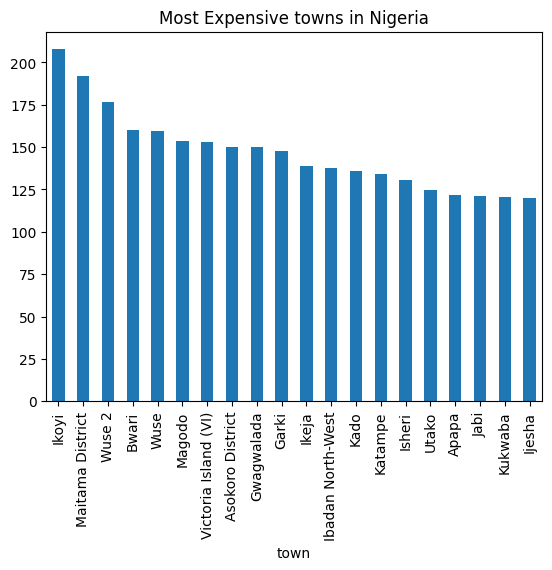

In [26]:
# checking the chart again to see if the all our changes above have addressed the issue of outliers in our data set.
# In addition to customizing our bar chart "title"
trimmed_data.groupby('town')['price_millions'].mean().sort_values(ascending=False).head(20).plot(kind='bar', title="Most Expensive towns in Nigeria");

### **Data Visualization**

In [27]:
import matplotlib.pyplot as plt

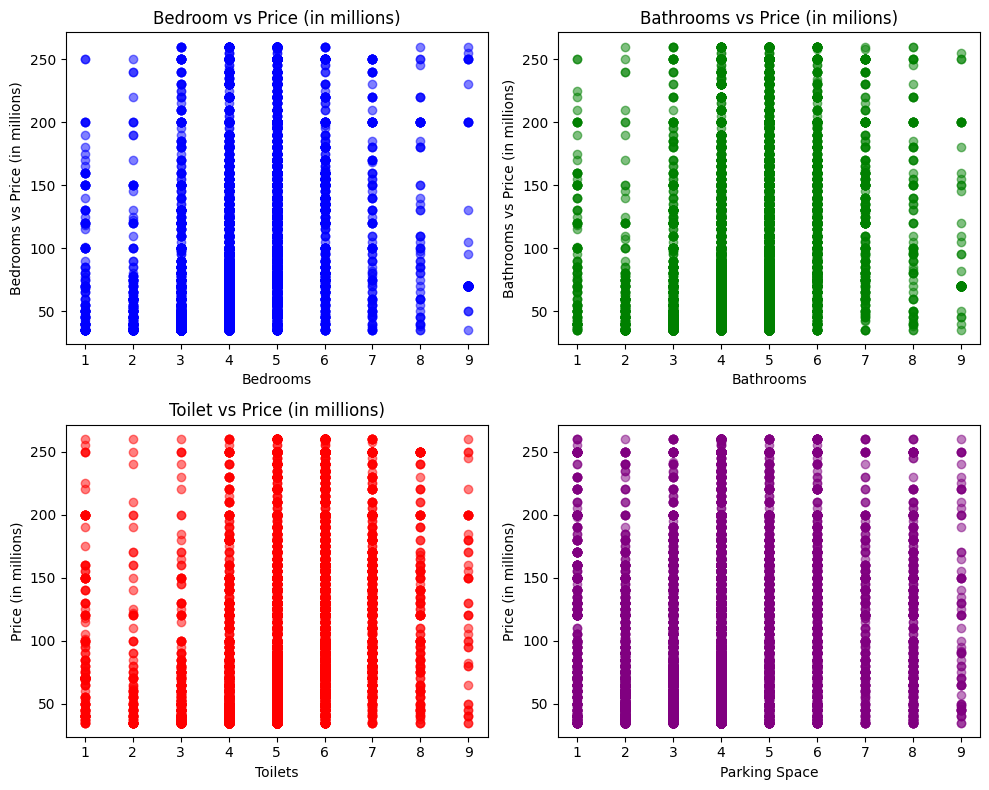

In [28]:
# setting up the plot size
plt.figure(figsize=(10, 8));

# 1. Scatter plot for Bedrooms versus Price (in millions) with special customization for color and titles.
plt.subplot(2, 2, 1)
plt.scatter(trimmed_data["bedrooms"], trimmed_data["price_millions"], color='blue', alpha=0.5)
plt.title("Bedroom vs Price (in millions)")
plt.xlabel("Bedrooms")
plt.ylabel("Bedrooms vs Price (in millions)")

# 2. Scatter plot for Bathroom versus price (in millions) with special customization for color and titles.
plt.subplot(2, 2, 2)
plt.scatter(trimmed_data["bathrooms"], trimmed_data["price_millions"], color='green', alpha=0.5)
plt.title("Bathrooms vs Price (in milions)")
plt.xlabel("Bathrooms")
plt.ylabel("Bathrooms vs Price (in millions)")

# 3.  Scatter plot for Toilet versus Price (in millions) with special cutomization for color and titles.
plt.subplot(2, 2, 3)
plt.scatter(trimmed_data["toilets"], trimmed_data["price_millions"], color='red', alpha=0.5)
plt.title("Toilet vs Price (in millions)")
plt.xlabel("Toilets")
plt.ylabel("Price (in millions)")

# 4. Scatter plot for Parking space versus Price (in millions) with special customization for color and titles.
plt.subplot(2, 2, 4)
plt.scatter(trimmed_data["parking_space"], trimmed_data["price_millions"], color='purple', alpha=0.5)
plt.xlabel("Parking Space")
plt.ylabel("Price (in millions)")

# Adjust the layout to prevent overlapping titles/labels
plt.tight_layout()
plt.show();

In [29]:
# Group data by title and calculate the mean price of the various groups which in this case is the "title".
title_price = trimmed_data.groupby('title')['price_millions'].mean() # the brackets () shows that 'title' is non-numerical data while 
                                                                    # the square bracket [] shows that 'price_millions' is numerical.
title_price

title
Block of Flats             80.886828
Detached Bungalow          52.983585
Detached Duplex           116.847164
Semi Detached Bungalow     71.306034
Semi Detached Duplex       86.595756
Terraced Bungalow          68.354373
Terraced Duplexes          82.508455
Name: price_millions, dtype: float64

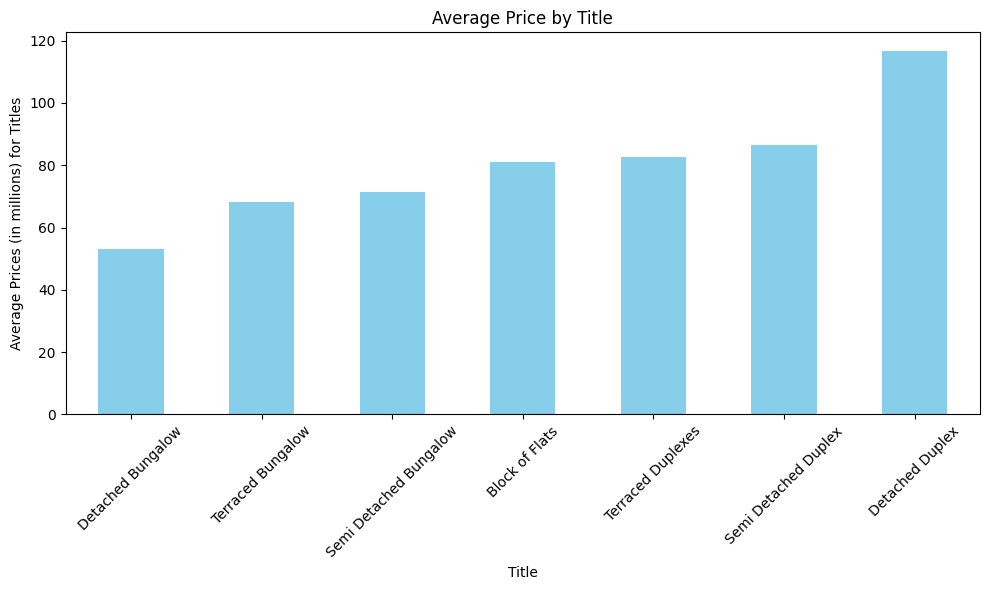

In [30]:
# Ploting a bar chart for the grouped data "title"
plt.figure(figsize=(10, 6))

# The bar chart for the grouped data will be plotted using the object oriented method and values will be
# sorted randomly from the mean of the grouped data.
title_price.sort_values().plot(kind='bar', color='skyblue')

# customizing the bar chart.
plt.title('Average Price by Title')
plt.xlabel('Title')
plt.ylabel('Average Prices (in millions) for Titles')
plt.xticks(rotation=45) # determines how the title on the x-axis will be positioned.
plt.tight_layout() # Adjust the layout to prevent overlapping titles/labels.
plt.show();

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

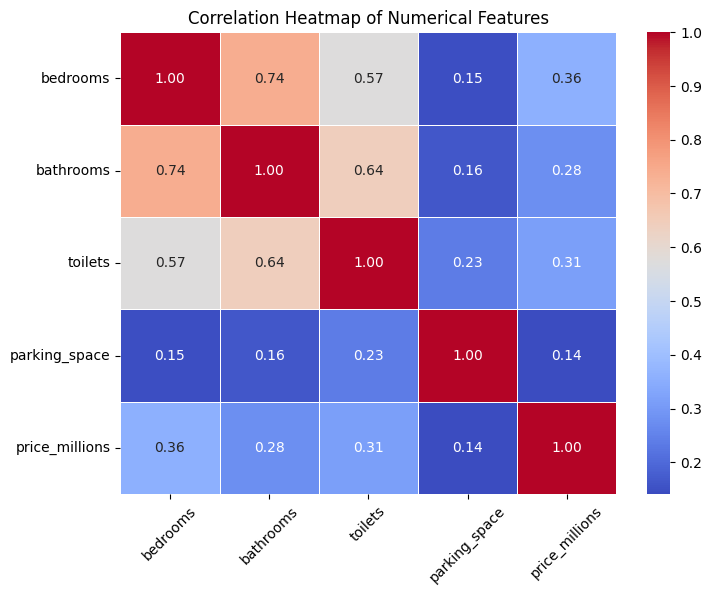

In [77]:
# select numerical features
numerical_features = trimmed_data[['bedrooms', 'bathrooms', 'toilets', 'parking_space', 'price_millions']]

# Computing / calculating the correlation matrix for the numerical features
corr = numerical_features.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# cutomizing the title heatmap
plt.title('Correlation Heatmap of Numerical Features')
plt.xticks(rotation=45) # determines how the title on the x-axis will be positioned.
plt.show();

In [31]:
trimmed_data

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price_millions
2,4,5,5,4,Detached Duplex,Lekki,Lagos,120.0
3,4,4,5,6,Detached Duplex,Ajah,Lagos,40.0
4,4,4,5,2,Semi Detached Duplex,Lekki,Lagos,75.0
5,4,4,5,2,Semi Detached Duplex,Lekki,Lagos,75.0
6,4,5,5,4,Detached Duplex,Lekki,Lagos,65.0
...,...,...,...,...,...,...,...,...
24318,4,5,5,4,Semi Detached Duplex,Lekki,Lagos,110.0
24320,3,4,4,5,Detached Duplex,Lekki,Lagos,80.0
24323,4,5,5,4,Detached Duplex,Lekki,Lagos,68.0
24324,3,4,4,3,Block of Flats,Victoria Island (VI),Lagos,78.0


# **Modelling**

In [32]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [33]:
# Assuming the dataset is already loaded into the variable trimmed_data
data = trimmed_data

### **Step 1:** Separate features (x) and target (y)

In [79]:
x = data[['bedrooms', 'bathrooms', 'toilets', 'parking_space', 'title', 'town', 'state']]
y = data['price_millions']

### **Step 2:** Encode categorical features 

Encoding categorical features can be done using the either the **one-hot encoding** method or **get dummies** approach, we will use the get dummies approach in our case.

**title**, **town** and **state** are categorical variables since they are "strings" or "non-numerical variables".

In [35]:
x = pd.get_dummies(x, columns=['title','town','state',], drop_first=True)

### **Step 3:** Split the dataset into training, validation, and tests sets
In our case we will use our data as follows **70% training**, **15% validation**, **15% testing**. 

In [80]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

### **Step 4:** Using models to evaluate our output
#### **4a:** Linear Regression (1st model)

In [37]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

**4a1:** Generating prediction on the validation set using the trained linear regression model.

In [38]:
linear_val_pred = linear_model.predict(x_val)

**4a2:** Calculating the Mean Squared Error (MSE)

* Calculating the Mean Squared Error (MSE) between the actual **target values (y_val)** which is "price" in our case and the **predicted values (linear_val_pred)** for the validation set.
* The **MSE** measures the average sqaured difference between the prediction and actual values. **A model with a lower the MSE the better than one with a larger MSE**

In [39]:
linear_val_mse = mean_squared_error(y_val, linear_val_pred)

**4a3:** Calculating the R-squared (r2) score validation set.

R-squared (r2) measures the proportion of variance in the target variable (y_val) explained by the model's predictions. I ranges from 0 to 1, where 1 indicates perfect predictions and 0 means the model explains none of the variance.

In [40]:
linear_val_r2 = r2_score(y_val, linear_val_pred)

In [41]:
# outputing the result of our MSE and its r2

print(f"The output of the Mean Squared Error (MSE) is:", linear_val_mse)
print(f"The output of its corresponding R-squared is:", linear_val_r2)

The output of the Mean Squared Error (MSE) is: 1748.8676148943148
The output of its corresponding R-squared is: 0.38555434063667005


#### **4b:** Decision Tree Regressor (2nd model)

In [42]:
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

* Using our second model to evaluate our validation set

In [43]:
dt_val_pred = decision_tree.predict(x_val) # setting the template for the evaluation.

dt_val_mse = mean_squared_error(y_val, dt_val_pred) # evaluating the MSE from the vaariable containing the DTR template "dt_val_pred".
dt_val_r2 = r2_score(y_val, dt_val_pred) # evalating the r2 from the variable  the variable containing the DTR template "dt_val_pred".

In [44]:
# Outputing the result of the DTR and its r2

print(f"The output of the Decision Tree Regressor (DTR) is:", dt_val_mse)
print(f"The output of its corresponding R-squared is:", dt_val_r2)

The output of the Decision Tree Regressor (DTR) is: 1946.7192332219665
The output of its corresponding R-squared is: 0.3160413214440868


#### **4c:** Random Forest Regressor (model 3)

In [45]:
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

* Validation set evaluation for Radom Forest regressor

In [46]:
rf_val_pred = random_forest.predict(x_val)

rf_val_mse = mean_squared_error(y_val, rf_val_pred)
rf_val_r2 = r2_score(y_val, rf_val_pred)

In [47]:
# Outputing the result for the RFR and its r2.

print(f"The output for the Random Forest Regressor (RFR)", rf_val_mse)
print(f"The output of its corresponding R-squared is:", rf_val_r2)

The output for the Random Forest Regressor (RFR) 1665.256078339826
The output of its corresponding R-squared is: 0.4149303467283082


*****NB:** Based  on the output gotten from our respective models, the RandomForestRegressor(RFR) is relatively the best model since it gives the best outputs for our validation set i.e a low MSE and an r2 that is closer to 1 relative to the other models***

### **Step 5:** Hyperparameters Tuning

Hyperparameter tuning in this case will focus on the Random Forest Model since it has a relatively acceptable result.

#### Hyperparameter Explanation for Random Forest
 **1**. 'n_estimators': The number of tree in the forest. More tree can improve performance but may increase computational time.
 
 **2**. 'max_depth': The maximum depth of the tree. Restricting the depth can prevent overfitting by limiting the complexity of the model.
 
 **3**. 'min_depth': The minimum number of samples required to split an internal node. Higher values prevent the mode from over learning.

Now, let's manually test these hyperparameters step by step.

In [48]:
# initialize RandomForestRegressor with default parameters
rf_model = RandomForestRegressor()

In [49]:
# Display the default parameters
(rf_model.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### **5a:** Train Random Forest with increased *'n_estimators'*

In [50]:
rf_estimators = RandomForestRegressor(n_estimators=300, random_state=42) # i.e increasing the estimator from the previous 100 to 300.
rf_estimators.fit(x_train, y_train)
estimators_val_pred = rf_estimators.predict(x_val)
estimators_val_mse = mean_squared_error(y_val, estimators_val_pred)
estimators_val_r2 = r2_score(y_val, estimators_val_pred)

print(f"Random Forest Regressor (n_estimators=300)")
print(f"Validation MSE: {estimators_val_mse:.2f}") # "2f" simply means round the output to 2 decimal place.
print(f"Validation R2: {estimators_val_r2:.2f}")

Random Forest Regressor (n_estimators=300)
Validation MSE: 1664.88
Validation R2: 0.42


#### **5b:** Train Random Forest Regressor with increased *'max_depth'*

In [43]:
rf_depth = RandomForestRegressor(n_estimators=100, max_depth=100, random_state=42)
rf_depth.fit(x_train, y_train)
depth_val_pred = rf_depth.predict(x_val)
depth_val_mse = mean_squared_error(y_val, depth_val_pred)
depth_val_r2 = r2_score(y_val, depth_val_pred)

print("Random Forest Regressor (n_estimator=100, max_depth=100):")
print(f"Validation MSE: {depth_val_mse:.2f}")
print(f"Validation R2: {depth_val_r2:.2f}\n")

Random Forest Regressor (n_estimator=100, max_depth=100):
Validation MSE: 1665.26
Validation R2: 0.41



#### **5c:** Using *Lasso model* with default parameter so as to tune *'alpha'* hyperparameter

In [44]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [45]:
# Initialize lasso model with default parameters (you can tune alpha)
lasso_model = Lasso(random_state=42)

# Fit the lasso model
lasso_model.fit(x_train, y_train)

# Predict on the validation set
lasso_val_pred = lasso_model.predict(x_val)

# Evaluate the model using MSE and r2
lasso_val_mse = mean_squared_error(y_val, lasso_val_pred)
lasso_val_r2 = r2_score(y_val, lasso_val_pred)

# print the results
print(f"Our lasso MSE:{lasso_val_mse}")
print(f"Our lasso r2: {lasso_val_r2}")

Our lasso MSE:2136.6290660441805
Our lasso r2: 0.24931856241176487


#### **5d:** Using *ElasticNet model* with default parameter so as to tune *'alpha'* and *'11_ratio'* hyperparameters.

In [47]:
from sklearn.linear_model import ElasticNet

In [48]:
# initialize ElasticNet model with default paramaters (you can tune alpha and 11_ratio)
elasticnet_model = ElasticNet(random_state=42)

# Fit the ElasticNet model
elasticnet_model.fit(x_train, y_train)

# Predict on validation set
elasticnet_val_pred = elasticnet_model.predict(x_val)

# Evaluate the model using the MSE and r2
elasticnet_val_mse = mean_squared_error(y_val, elasticnet_val_pred)
elasticnet_val_r2 = r2_score(y_val, elasticnet_val_pred)

# print the results
print(f'ElasticNet MSE: {elasticnet_val_mse}')
print(f'Elasticnet r2: {elasticnet_val_r2}')

ElasticNet MSE: 2396.512020517977
Elasticnet r2: 0.15801150637219608


# **Advanced Modelling**

Since non of our models gave a very good **MSE** and **r2** values and **even after tuning some hyper parameter value**, we will proceed to use some more **powerful models** which do not require any form of encoding.  

In [74]:
data

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price_millions
2,4,5,5,4,Detached Duplex,Lekki,Lagos,120.0
3,4,4,5,6,Detached Duplex,Ajah,Lagos,40.0
4,4,4,5,2,Semi Detached Duplex,Lekki,Lagos,75.0
5,4,4,5,2,Semi Detached Duplex,Lekki,Lagos,75.0
6,4,5,5,4,Detached Duplex,Lekki,Lagos,65.0
...,...,...,...,...,...,...,...,...
24318,4,5,5,4,Semi Detached Duplex,Lekki,Lagos,110.0
24320,3,4,4,5,Detached Duplex,Lekki,Lagos,80.0
24323,4,5,5,4,Detached Duplex,Lekki,Lagos,68.0
24324,3,4,4,3,Block of Flats,Victoria Island (VI),Lagos,78.0


In [75]:
y

2        120.0
3         40.0
4         75.0
5         75.0
6         65.0
         ...  
24318    110.0
24320     80.0
24323     68.0
24324     78.0
24325     65.0
Name: price_millions, Length: 17166, dtype: float64

### **Model 1:** XG Boost Model

In [68]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Intialize XGBoost model with default parameters
xgboost_model = XGBRegressor(random_state=42)

# Fit the XGBoost model
xgboost_model.fit(x_train, y_train)

# Predict on the validation set
xgboost_val_pred = xgboost_model.predict(x_val)

# Evaluate model using MSE and r2
xgboost_val_mse = mean_squared_error(y_val, xgboost_val_pred)
xgboost_val_r2 = r2_score(y_val, xgboost_val_pred)

# Print the results
print(f"XGBoost MSE: {xgboost_val_mse}")
print (f"XGBoot r2: {xgboost_val_r2}")

XGBoost MSE: 1598.8602159628063
XGBoot r2: 0.43825781250662


### **Model 2:** CatBoost Model

****NB**: To be able to use this advanced model in a successful way and avoid errors like ***"'title' is not in list"*** you must return back to the second step in the modelling aspect of your project which is to ***"Encode Categorical Variables"***, once there unencode the categorical variables and train the your model again using the test, training and validation dataset before finally coming back to use your advanced model which is the CatBoost model in our case**

In [81]:
data = trimmed_data

x = data[['bedrooms', 'bathrooms', 'toilets', 'parking_space', 'title', 'town', 'state',]]
y = data['price_millions']

In [82]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Specify catigorical features indices
#x = pd.get_dummies(x, columns=['title','town','state',], drop_first=True)

categorical_features = ['title','town','state']

# Initialize CatBoost
catboost_model = CatBoostRegressor(cat_features=categorical_features, random_state=42, verbose=0)

# Fit the model
catboost_model.fit(x_train, y_train)

# Predict and evaluate
catboost_val_pred = catboost_model.predict(x_val)

# Calculate MSE and r2
catboost_val_mse = mean_squared_error(y_val, catboost_val_pred)
catboost_val_r2 = r2_score(y_val, catboost_val_pred)

# printing our output
print("CatBoost mse", catboost_val_mse)
print("CatBoost r2", catboost_val_r2)

CatBoost mse 1559.193576457429
CatBoost r2 0.45219425587033446


In [83]:
# Predict on the test set
catboost_test_pred = catboost_model.predict(x_test)

# calculate MSE and r2 for the test set
catboost_test_mse = mean_squared_error(y_test, catboost_test_pred)
catboost_test_r2 = r2_score(y_test, catboost_test_pred)

print("CatBoost Test MSE:", catboost_test_mse)
print("CatBoost Test r2:", catboost_test_r2)

CatBoost Test MSE: 1561.9784259952814
CatBoost Test r2: 0.4804958904790818


In [85]:
!pip install gradio

# **Testing Deployment On Gradio**

In [90]:
import gradio as gr
import pandas as pd
from catboost import CatBoostRegressor

# Assumming trimmed_data is already loaded
# Replace this with the actual trimmed_data loading logic if not already defined
# Example: trimmed_data = pd.read_csv("trimmed_data.csv")

# Extract unique values for dropdowns
titles = sorted(trimmed_data['title'].unique())
towns = sorted(trimmed_data['town'].unique())
states = sorted(trimmed_data['state'].unique())

# specify categorical features indices
categorical_features = ['title','town','state',]

# Define the trained catBoost model
catboost_model = CatBoostRegressor(cat_features=categorical_features, random_state=42, verbose=0)

# Assuming the model is already trained
catboost_model.fit(x_train, y_train)

# Define the prediction function
def predict_house_price(bedrooms, toilets, parking_space, title, town, state):
    # Prepare input data
    input_data = pd.DataFrame({
        "bedrooms": [bedrooms],
        "bathrooms": [bathrooms],
        "parking_space": [parking_space],
        "title": [title],
        "town": [town],
        "state":[state]
    })

    # Predict house prices
    predicted_price = catboost_model.predict(input_data)
    return f"#{predicted_price[0]:,.2f} million"

    # Define the Gradio interface
    with gr.Blocks() as interface:
        gr.Markdown("Pridict house prices predictor from Data Science IDEAS COURSE")
        gr.Markdown("predict house prices based on property's details using a pre-trained Catboost model")


        with gr.Row():
            bedrooms = gr.Number(label="Numbers of Bedrooms", value=3)
            bathrooms = gr.Number(label="Number of Bathrooms", value=2)
            toilets = gr.Number(label="Number of Toilets", value=2)
            parking_space = gr.Number(label="Parking Space", value=1)

        title = gr.Dropdown(choices=titles, label="Title")
        town = gr.Dropdown(choice=towns, label="Town")
        state = gr.Dropdown(choices=states, label="State")